In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import pickle
import matplotlib.pyplot as plt
from itertools import cycle


In [4]:
# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/ian/Iris.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Prepare the data
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [6]:
# Encode the target variable
y_encoded, y_classes = pd.factorize(y)

# Binarize the output for multi-class ROC AUC
n_classes = len(y_classes)
y_bin = label_binarize(y_encoded, classes=range(n_classes))

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Save the model using pickle
with open('iris_forecasting_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
ROC AUC Score: 1.0


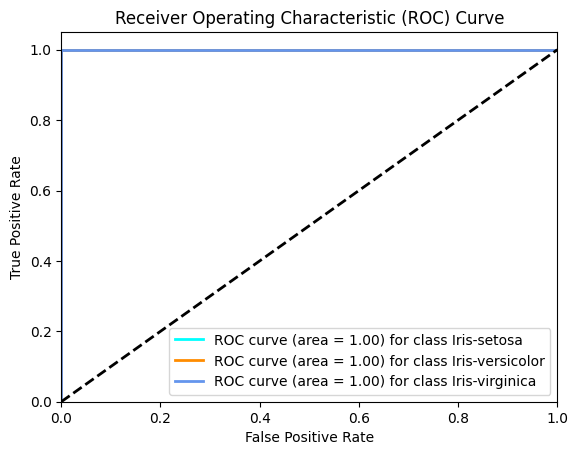

In [10]:
# Evaluate the model
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_metrics = classification_report(y_test, y_pred, target_names=y_classes)
print("Classification Report:\n", classification_metrics)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate ROC and AUC
y_proba = rfc.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=range(n_classes))
roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {y_classes[i]}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
import warnings
warnings.filterwarnings("ignore")

sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

# Make predictions
input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
with open('iris_forecasting_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

prediction = loaded_model.predict(input_data)
predicted_class = y_classes[prediction[0]]
print("Predicted species:", predicted_class)


Enter sepal length (cm): 4.7
Enter sepal width (cm): 3.2
Enter petal length (cm): 1.3
Enter petal width (cm): 0.2
Predicted species: Iris-setosa
